<a href="https://colab.research.google.com/github/Adukemi/OASIS_INFOBYTE/blob/main/Project2_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2, Level 1

# Customer Segmentation Analysis

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle any missing or inconsistent data

df = pd.read_csv('/content/ifood_df.csv')

df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


## Data Exploration and Cleaning

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
df.nunique()


,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [8]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [9]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
df = df.drop_duplicates()

In [11]:
# Descriptive statistics for numerical columns
print(df.describe())
print("\n\n")

# Calculate average total spending
avg_spending = df['MntTotal'].mean()
print(f'Average Total Spending: {avg_spending}')

# Calculate frequency of purchases
purchase_frequency = df['AcceptedCmpOverall'].sum() / len(df)
print(f'Average Purchase Frequency: {purchase_frequency}')

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

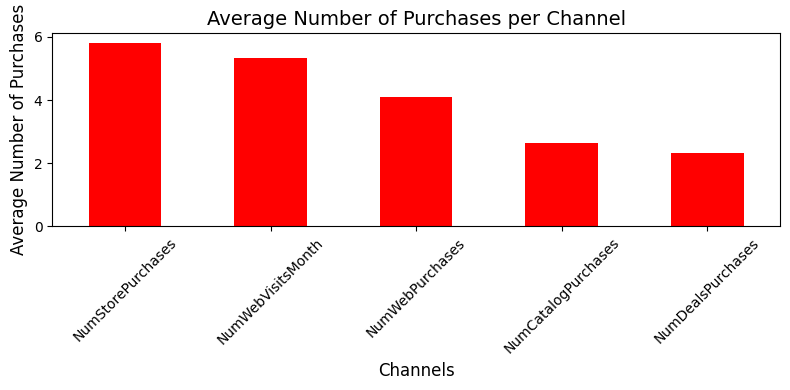

In [17]:
# Frequency of purchases (average number of purchases through different channels)
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
avg_purchases_per_channel = df[channels].mean()
avg_purchases_per_channel

# Sort the values in descending order
avg_purchases_per_channel = avg_purchases_per_channel.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 4))
avg_purchases_per_channel.plot(kind='bar', color='red')

# Add title and labels
plt.title('Average Number of Purchases per Channel', fontsize=14)
plt.xlabel('Channels', fontsize=12)
plt.ylabel('Average Number of Purchases', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Avg_recency: 49.00907029478458





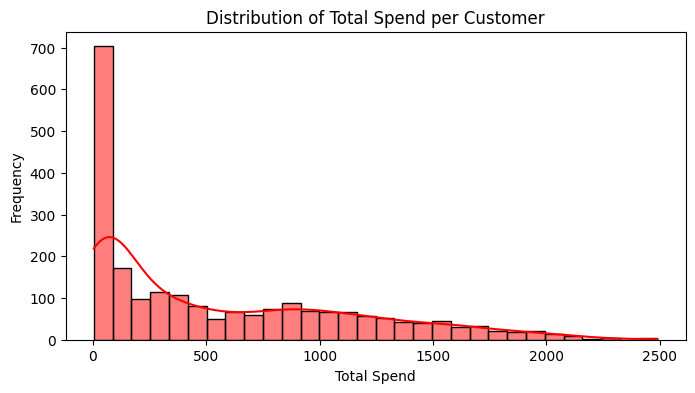

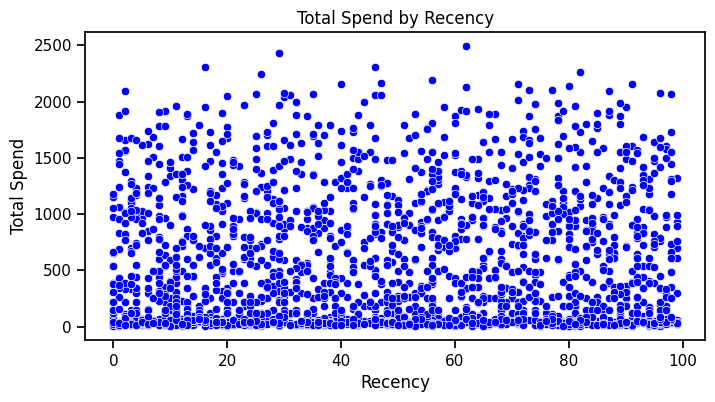

In [19]:
# Calculate the average recency
Avg_recency = df['Recency'].mean()
print("Avg_recency:", Avg_recency)
print("\n\n")

# Create a figure and axis for the distribution of total spend per customer
plt.figure(figsize=(8, 4))
sns.histplot(df['MntTotal'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()
print("\n\n")

# Create a figure and axis for total spend by recency.
sns.set(style=None)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Recency', y='MntTotal', data=df, color='blue')
plt.title('Total Spend by Recency')
plt.xlabel('Recency')
plt.ylabel('Total Spend')
plt.show()

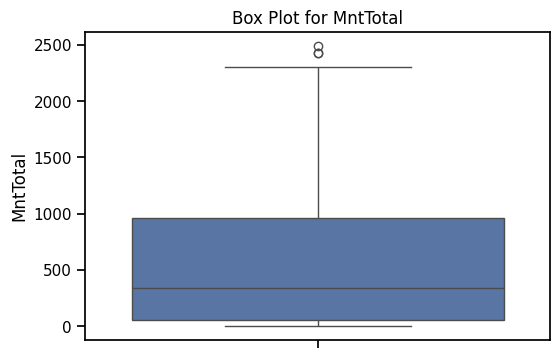



After Removing Outliers:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [20]:
# Check if columns exist before dropping them
columns_to_drop = ['Z_CostContact', 'Z_Revenue']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=False)

# total amount spent on all products (MntTotal)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
#outliers.head()

#Removing Outliers
print("\n\nAfter Removing Outliers:")
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()

<ipython-input-26-1999d9a331bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Income', palette='viridis')


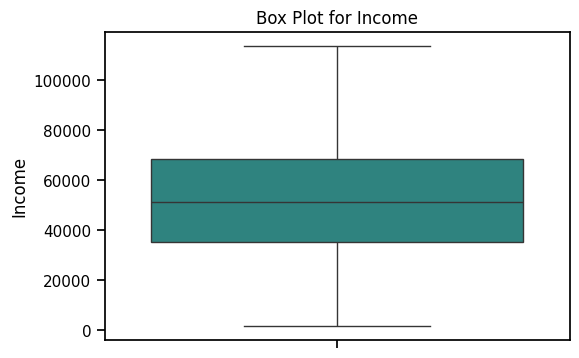

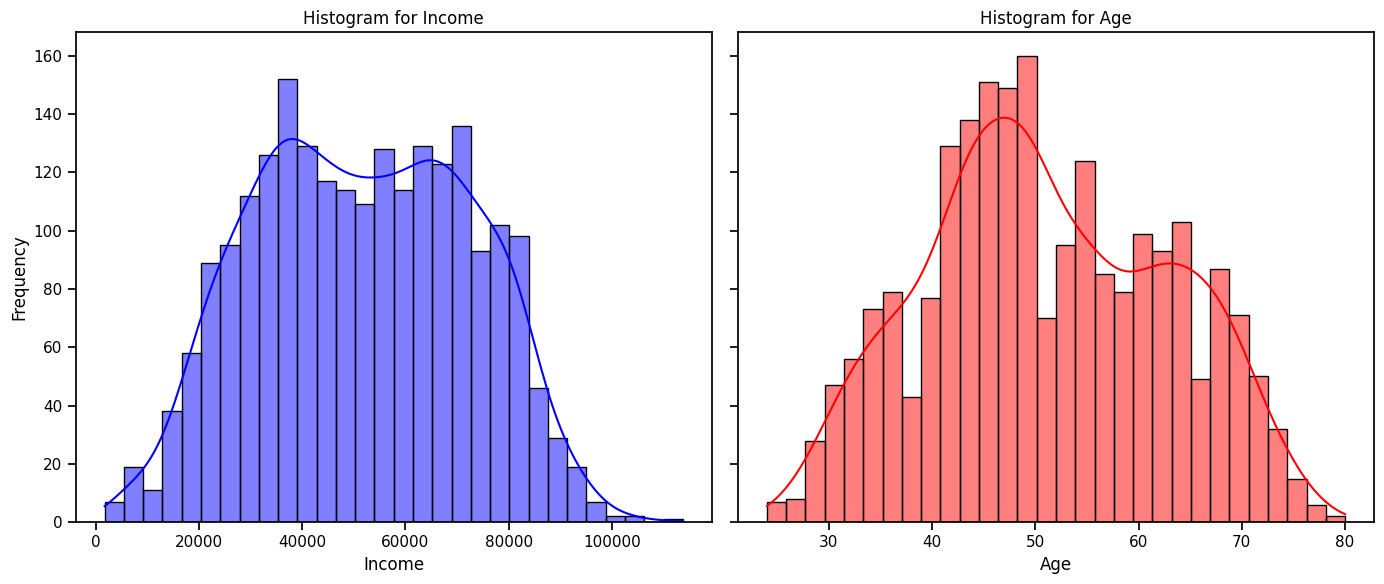



Skewness: 0.089941
Kurtosis: -0.797036


In [26]:
# Box Plot for Income
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()
print("\n\n")

# Plot histograms for Income and Age
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for Income
sns.histplot(data=df, x='Income', bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram for Income')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

# Histogram for Age
sns.histplot(data=df, x='Age', bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('Histogram for Age')
axes[1].set_xlabel('Age')

plt.tight_layout()
plt.show()

# Skewness and Kurtosis for Age
print("\n")
print("Skewness: %f" % df['Age'].skew())
print("Kurtosis: %f" % df['Age'].kurt())

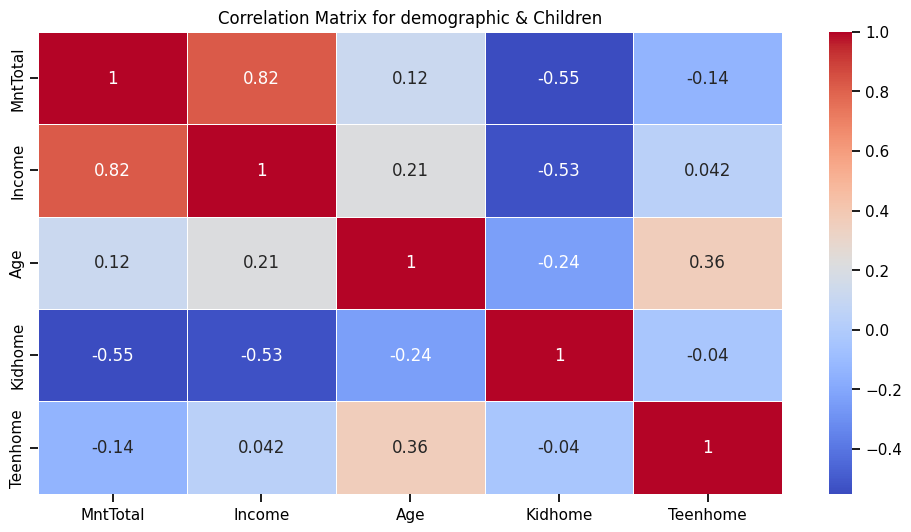

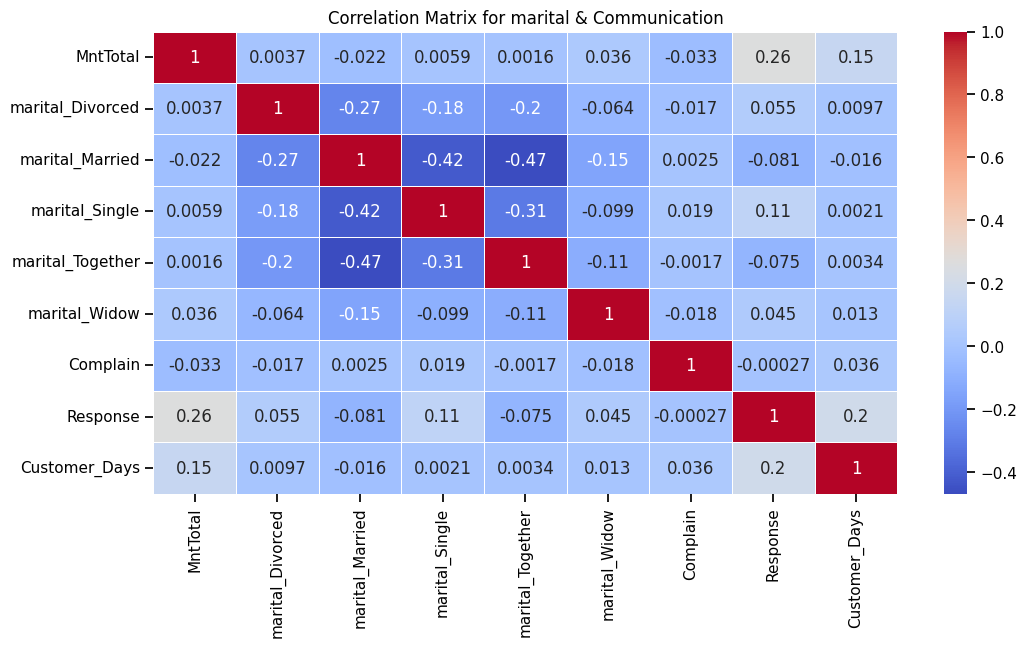

In [27]:
# Correlation Matrix
cols_demographic = ['Income', 'Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

# Plot Correlation Matrix
# Correlation Matrix for demographic & Children
plt.figure(figsize=(12, 6))
corr_matrix = df[['MntTotal'] + cols_demographic + cols_children].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for demographic & Children')
plt.show()
print("\n")

# Correlation Matrix for marital & Communication
plt.figure(figsize=(12, 6))
corr_matrix = df[['MntTotal'] + cols_marital + cols_communication].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for marital & Communication')
plt.show()

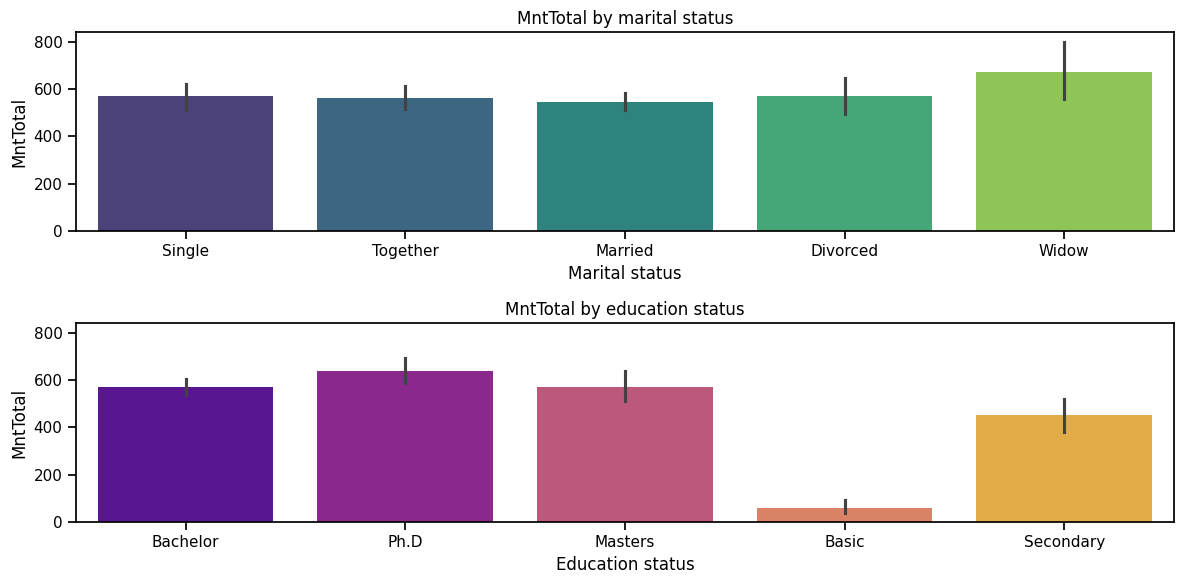

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,Education,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,Single,Bachelor,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,Single,Bachelor,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,Together,Bachelor,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,Together,Bachelor,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,Married,Ph.D,1


In [30]:
# Marital Status
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

# Education Status
def get_education_status(row):
    if row['education_2n Cycle'] == 1:
        return 'Secondary'
    elif row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_Graduation'] == 1:
        return 'Bachelor'
    elif row['education_Master'] == 1:
        return 'Masters'
    elif row['education_PhD'] == 1:
        return 'Ph.D'
    else:
        return 'Unknown'
df['Education'] = df.apply(get_education_status, axis=1)

# Filter out 'Unknown' education status
df_filtered = df[df['Education'] != 'Unknown']

# Plot Correlation Matrix
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharey=True)
# Plot for Marital Status
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis', hue='Marital', legend=False, ax=axes[0])
axes[0].set_title('MntTotal by marital status')
axes[0].set_xlabel('Marital status')
axes[0].set_ylabel('MntTotal')

# Plot for Education
sns.barplot(x='Education', y='MntTotal', data=df_filtered, palette='plasma', hue='Education', legend=False, ax=axes[1])
axes[1].set_title('MntTotal by education status')
axes[1].set_xlabel('Education status')
axes[1].set_ylabel('MntTotal')

plt.tight_layout()
plt.show()

print("\n\n")
# In a relationship
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()

# Customer Segmentation

In [31]:
# Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns.
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df.copy()

# Check if 'In_relationship' column exists in the dataframe
if 'In_relationship' in df.columns:
    data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
else:
    # Handle the case where 'In_relationship' column is missing
    cols_for_clustering.remove('In_relationship')
    data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])

print(data_scaled[cols_for_clustering].head())

data_scaled[cols_for_clustering].describe()

     Income  MntTotal  In_relationship
0  0.314651  1.678056        -1.347625
1 -0.254877 -0.940880        -1.347625
2  0.965354  0.297384         0.742046
3 -1.206087 -0.893989         0.742046
4  0.322136 -0.270516         0.742046


,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


kmeans.cluster_centers_:
 [[ 1.60439919  1.61170791  3.24054588]
 [ 0.47256101  0.44443297 -0.18261368]
 [-0.74895845 -0.74155669 -0.30196025]
 [ 1.68331073  1.70302932  0.19306183]]





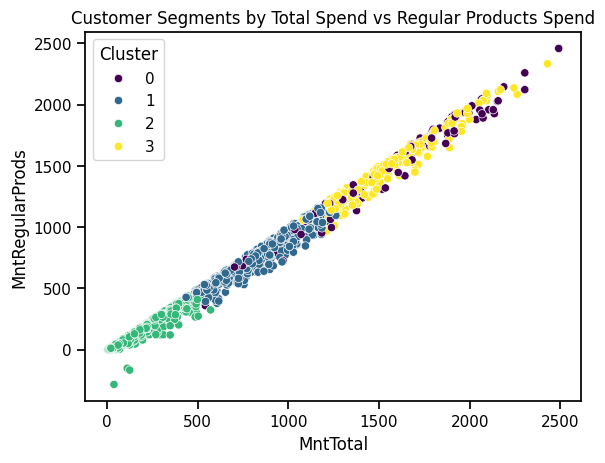

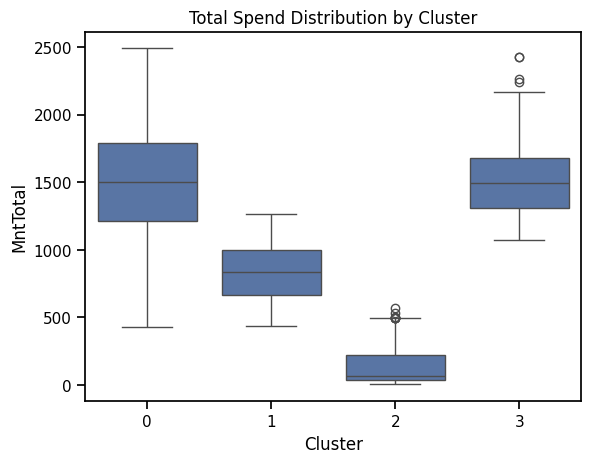

In [32]:
# Select relevant features for clustering
features = df[['MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Check the cluster centers
print("kmeans.cluster_centers_:\n",kmeans.cluster_centers_)
print("\n\n")

# Scatter plot of clusters
sns.scatterplot(x='MntTotal', y='MntRegularProds', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments by Total Spend vs Regular Products Spend')
plt.show()
print("\n\n")

# Boxplot of spending by cluster
sns.boxplot(x='Cluster', y='MntTotal', data=df)
plt.title('Total Spend Distribution by Cluster')
plt.show()

In [33]:
# Group by clusters and calculate average metrics
cluster_summary = df.groupby('Cluster').agg({
    'MntTotal': 'mean',
    'MntRegularProds': 'mean',
    'AcceptedCmpOverall': 'mean',
    'marital_Married': 'mean',
    'marital_Single': 'mean',
    'marital_Together': 'mean',
    'marital_Widow': 'mean',
    'education_2n Cycle': 'mean',
    'education_Basic': 'mean',
    'education_Graduation': 'mean',
    'education_Master': 'mean',
    'education_PhD': 'mean'
})
print(cluster_summary)

            MntTotal  MntRegularProds  AcceptedCmpOverall  marital_Married  \
Cluster                                                                      
0        1486.587786      1411.145038            2.503817         0.435115   
1         834.868231       764.799639            0.175090         0.355596   
2         131.509631       108.091493            0.093900         0.398074   
3        1532.025547      1461.711679            0.430657         0.379562   

         marital_Single  marital_Together  marital_Widow  education_2n Cycle  \
Cluster                                                                        
0              0.198473          0.229008       0.045802            0.076336   
1              0.196751          0.272563       0.052347            0.084838   
2              0.221509          0.257624       0.025682            0.100321   
3              0.240876          0.240876       0.032847            0.058394   

         education_Basic  education_Graduation  ed

# Derived Insights:

- The majority of customers spend less than $500, with very few exceeding $2,000.
- Customers with recent purchases (low recency) show diverse spending, while those with high recency spend much less.
- The median spending is below $500, with significant outliers around $2,000+.
- Widowed customers spend the most, followed by married and divorced individuals. Single and "together" groups spend less.
- Customers with Ph.D. and Master's degrees spend the most, while those with Basic education spend the least. Secondary education customers surprisingly spend more than Bachelor’s degree holders.
- Income levels are broad, but the median falls in a mid-income range.
- Income is mostly concentrated in mid-to-high brackets. Age distribution peaks around younger to middle-aged groups.
- Spending correlates with features like education and marital status, while some variables (e.g., number of children) show negative correlations.
- Spending patterns differ significantly across clusters, with some clusters spending much more on regular products.
- High-spending clusters show significant variability, while low-spending clusters are more consistent.

# Recommendations:

- Implement strategies like upselling or exclusive offers for high spenders to increase their engagement. For low spenders, introduce discounts or bundles to encourage higher spending.
- Create reactivation campaigns for customers with high recency, offering personalized discounts or reminders.
- Investigate the outliers to identify characteristics of high spenders and replicate these traits in marketing strategies.
- Focus on premium and loyalty campaigns for widowed customers and targeted promotions to boost spending for single and "together" groups.
- Offer premium products for highly educated groups, affordable bundles for Basic education customers, and explore strategies to retain high spending from Secondary-level customers.
- Develop mid-tier product offerings while targeting high-income customers with luxury options.
- Target younger and middle-aged segments with dynamic campaigns and products suited to their lifestyles.
- Tailor strategies for high-spending clusters, such as loyalty programs or exclusive offers. For lower-spending clusters, design engagement campaigns to boost activity.
- Focus marketing and retention efforts on clusters with high variability to maximize returns.
